In [1]:
import pandas            as     pd 
import numpy             as     np 
from   sklearn.metrics   import mean_squared_error
from   math              import sqrt
import matplotlib.pyplot as     plt 
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [3]:
#Importing data
def parser(x):
    return pd.datetime.strptime(x, '%Y-%m')
 
df = pd.read_csv(r'C:\Users\akash\Desktop\airline-passengers.csv', header=0, parse_dates=[0], squeeze=True, date_parser=parser)

print(df.head())
#df.plot() 


       Month  Passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121


In [4]:
df.Timestamp = pd.to_datetime(df.Month, format='%Y-%m') 
df.index     = df.Timestamp 

In [5]:
df.Timestamp.head(2)

0   1949-01-01
1   1949-02-01
Name: Month, dtype: datetime64[ns]

In [6]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

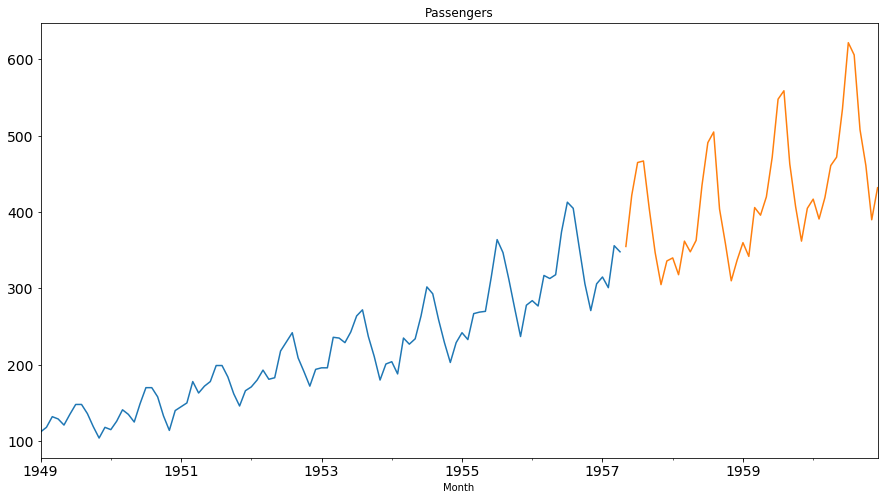

In [7]:
train['Passengers'].plot(figsize=(15,8), title= 'Passengers', fontsize=14)
test['Passengers'].plot(figsize=(15,8), title= 'Passengers', fontsize=14)

In [8]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [9]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [10]:
df1         =   df.copy() # Make a copy

time        = [i+1 for i in range(len(df))]
df1['time'] = time
monthDf     = df1[['Month']]

df1.drop('Month', axis=1, inplace=True)
df1.head(2)

,Passengers,time
Month,,
1949-01-01,112,1
1949-02-01,118,2


In [11]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [12]:
x_train = train.drop('Passengers', axis=1)
x_test  = test.drop('Passengers', axis=1)
y_train = train[['Passengers']]
y_test  = test[['Passengers']]

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

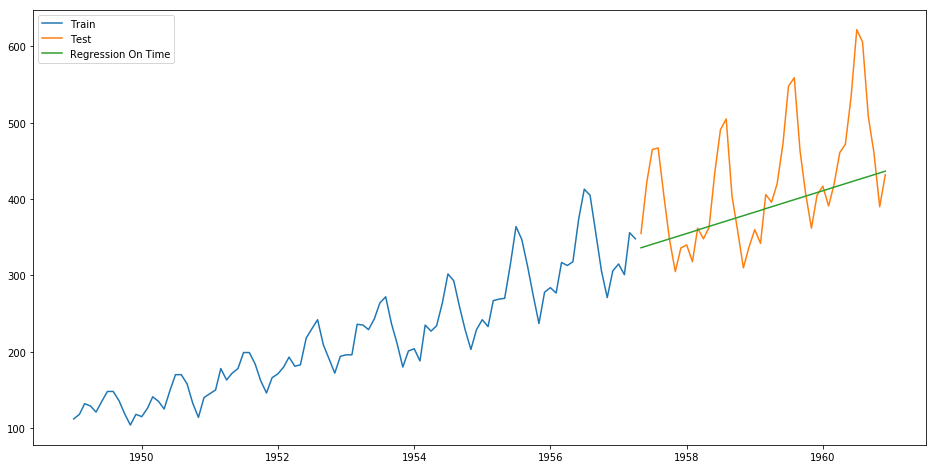

In [16]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [17]:
rmse = sqrt(mean_squared_error(test.Passengers, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Passengers, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 75.678 MAPE is 13.04


In [18]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf

,Method,rmse,mape
0,RegressionOnTime,75.678,13.04


In [19]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time
print(df1.head())
print(df1.shape[0])
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

                Month  Passengers  time
Month                                  
1949-01-01 1949-01-01         112     1
1949-02-01 1949-02-01         118     2
1949-03-01 1949-03-01         132     3
1949-04-01 1949-04-01         129     4
1949-05-01 1949-05-01         121     5
144


In [20]:
df1['monthSeasonality'] = monthSeasonality * 12
df1.head()

,Month,Passengers,time,monthSeasonality
Month,,,,
1949-01-01,1949-01-01,112,1,m1
1949-02-01,1949-02-01,118,2,m2
1949-03-01,1949-03-01,132,3,m3
1949-04-01,1949-04-01,129,4,m4
1949-05-01,1949-05-01,121,5,m5


In [21]:
df1.shape

(144, 4)

In [22]:
monthDf = df1[['Month']]
df1.drop('Month', axis=1, inplace=True)

In [23]:
monthDf.head(2)

,Month
Month,
1949-01-01,1949-01-01
1949-02-01,1949-02-01


In [24]:
df1.head(3)

,Passengers,time,monthSeasonality
Month,,,
1949-01-01,112,1,m1
1949-02-01,118,2,m2
1949-03-01,132,3,m3


In [25]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(2)

,Passengers,time,monthSeasonality_m10,monthSeasonality_m11,monthSeasonality_m12,monthSeasonality_m2,monthSeasonality_m3,monthSeasonality_m4,monthSeasonality_m5,monthSeasonality_m6,monthSeasonality_m7,monthSeasonality_m8,monthSeasonality_m9
Month,,,,,,,,,,,,,
1949-01-01,112,1,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,118,2,0,0,0,1,0,0,0,0,0,0,0


In [26]:
df1Complete.head(2).T

Month,1949-01-01 00:00:00,1949-02-01 00:00:00
Passengers,112,118
time,1,2
monthSeasonality_m10,0,0
monthSeasonality_m11,0,0
monthSeasonality_m12,0,0
monthSeasonality_m2,0,1
monthSeasonality_m3,0,0
monthSeasonality_m4,0,0
monthSeasonality_m5,0,0
monthSeasonality_m6,0,0


In [27]:
df1Complete.shape

(144, 13)

In [28]:
#Creating train and test set 
train=df1Complete[0:int(len(df1Complete)*0.7)] 
test=df1Complete[int(len(df1Complete)*0.7):]

In [29]:
x_train  = train.drop('Passengers', axis=1)
x_test   = test.drop('Passengers', axis=1)
y_train  = train[['Passengers']]
y_test   = test[['Passengers']]

In [30]:
model    = LinearRegression()

In [31]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
predictions = model.predict(x_test)

In [33]:
y_test['RegOnTimeSeasonal'] = predictions

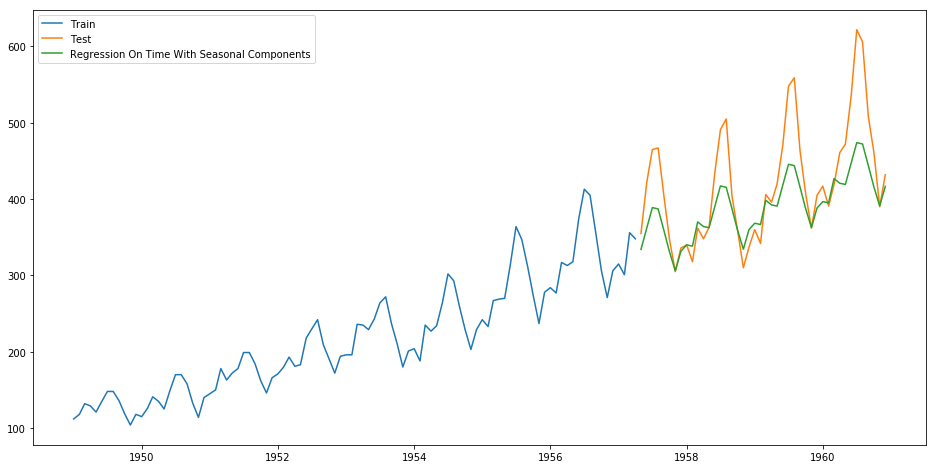

In [34]:
plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [35]:
rmse = sqrt(mean_squared_error(test.Passengers, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
mape = MAPE(test.Passengers, y_test.RegOnTimeSeasonal)
print("For RegOnTimeSeasonal,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegOnTimeSeasonal,  RMSE is 53.493 MAPE is 9.01


In [36]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,75.678,13.04
0,RegressionOnTimeSeasonal,53.493,9.01


# #Naive Approach

In [37]:
dd= np.asarray(train.Passengers)

In [38]:
y_hat = test.copy()

In [39]:
y_hat['naive'] = dd[len(dd)-1]

In [40]:
dd

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348], dtype=int64)

In [41]:
y_hat['naive'].tail(2)

Month
1960-11-01    348
1960-12-01    348
Name: naive, dtype: int64

Text(0.5, 1.0, 'Naive Forecast')

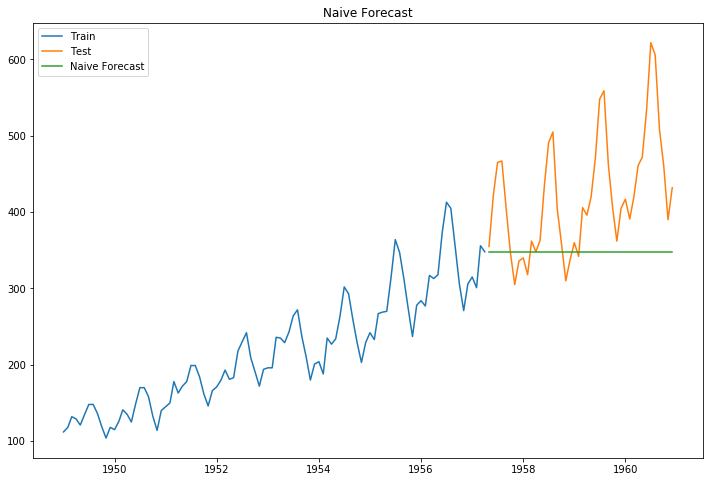

In [42]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [43]:
rmse = sqrt(mean_squared_error(test.Passengers, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Passengers, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 105.750 MAPE is 18.96


In [44]:
tempResultsDf = pd.DataFrame({'Method':['Naive model'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,75.678,13.04
0,RegressionOnTimeSeasonal,53.493,9.01
0,Naive model,105.750,18.96


# Method 4: Simple Average

In [45]:
y_hat_avg = test.copy()

In [46]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [47]:
train['Passengers'].mean()

218.36

In [48]:
y_hat_avg['avg_forecast'].head(2)

Month
1957-05-01    218.36
1957-06-01    218.36
Name: avg_forecast, dtype: float64

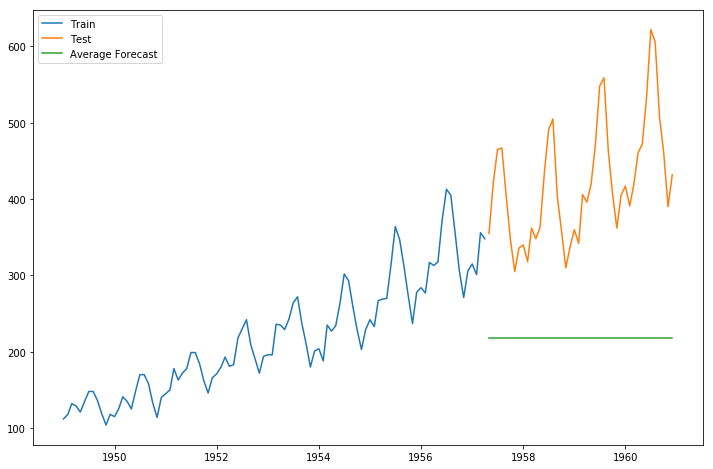

In [49]:
plt.figure(figsize=(12,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [50]:
rmse = sqrt(mean_squared_error(test.Passengers, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Passengers, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 216.644 MAPE is 48.14


In [51]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,RegressionOnTime,75.678,13.04
0,RegressionOnTimeSeasonal,53.493,9.01
0,Naive model,105.750,18.96
0,Simple Average,216.644,48.14


In [52]:
resultsDf

,Method,rmse,mape
0,RegressionOnTime,75.678,13.04
0,RegressionOnTimeSeasonal,53.493,9.01
0,Naive model,105.750,18.96
0,Simple Average,216.644,48.14


# Method 5: Moving Average(MA)

In [53]:
df1 = df.copy()

In [54]:
df1['moving_avg_forecast_4']  = df['Passengers'].rolling(4).mean()
df1['moving_avg_forecast_6']  = df['Passengers'].rolling(6).mean()
df1['moving_avg_forecast_8']  = df['Passengers'].rolling(8).mean()
df1['moving_avg_forecast_12'] = df['Passengers'].rolling(12).mean()

For Simple Average model, moving_avg_forecast_4  RMSE is 54.067 MAPE is 10.71
For Simple Average model, moving_avg_forecast_6  RMSE is 67.887 MAPE is 13.79
For Simple Average model, moving_avg_forecast_8  RMSE is 73.376 MAPE is 14.76
For Simple Average model, moving_avg_forecast_12  RMSE is 69.008 MAPE is 12.78


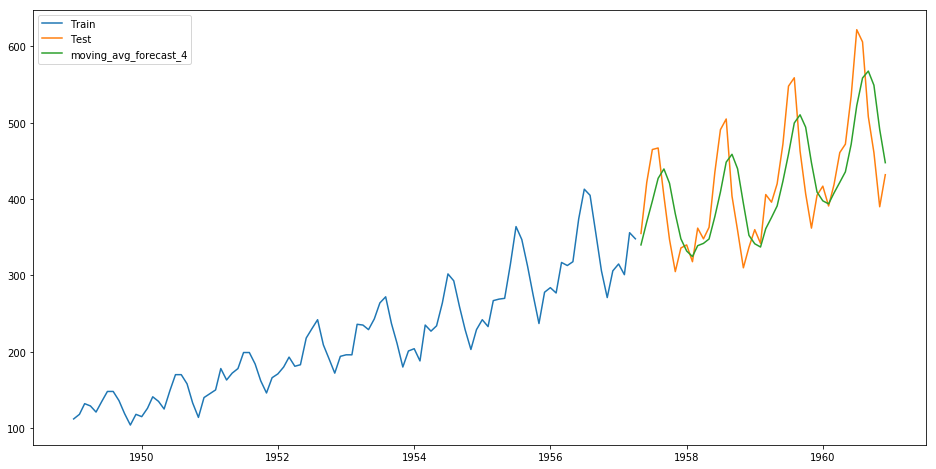

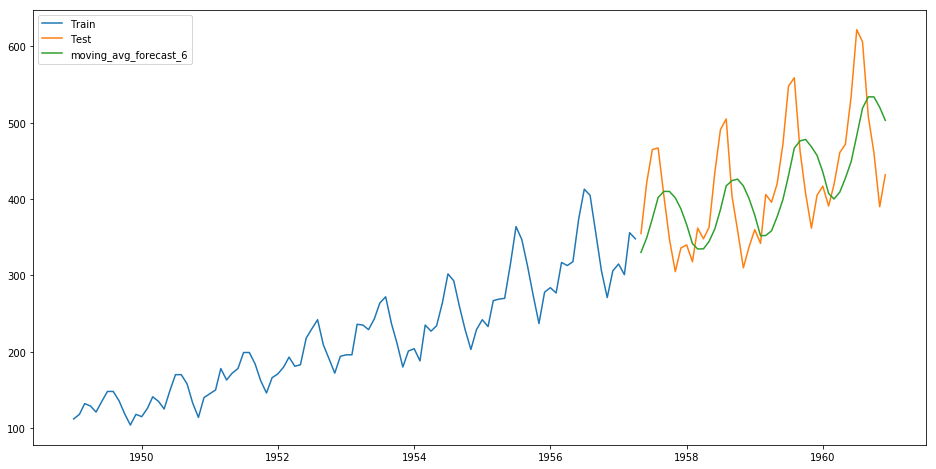

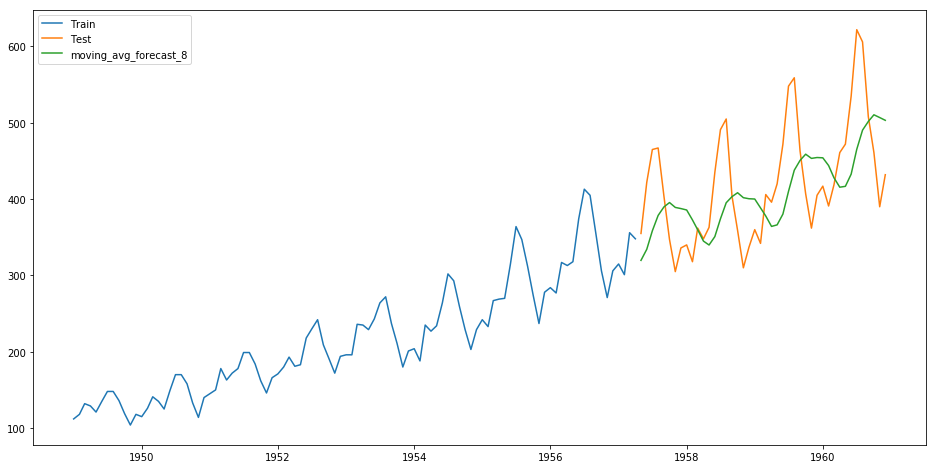

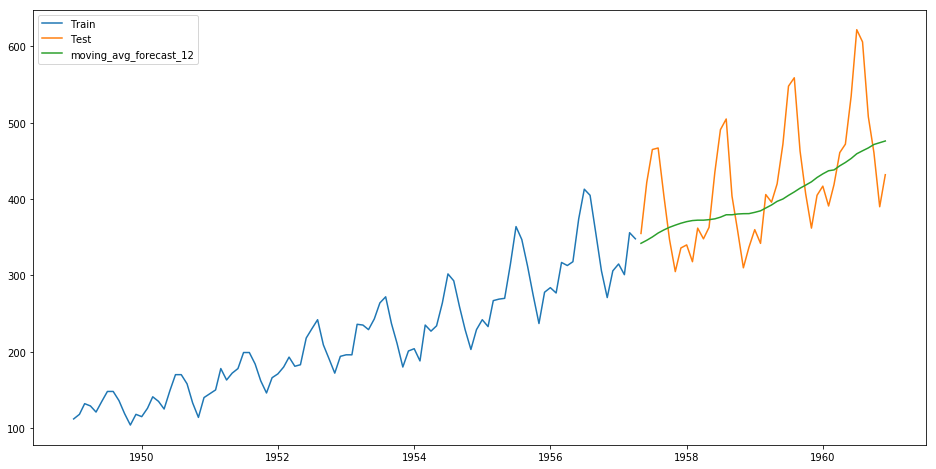

In [55]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Passengers'], label='Train')
    plt.plot(test['Passengers'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    rmse = sqrt(mean_squared_error(test.Passengers, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test.Passengers, y_hat_avg[col_name])
    print("For Simple Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))

    tempResultsDf = pd.DataFrame({'Method':[col_name], 'rmse': [rmse], 'mape' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

In [56]:
print(resultsDf)

                     Method     rmse   mape
0          RegressionOnTime   75.678  13.04
0  RegressionOnTimeSeasonal   53.493   9.01
0               Naive model  105.750  18.96
0            Simple Average  216.644  48.14
0     moving_avg_forecast_4   54.067  10.71
0     moving_avg_forecast_6   67.887  13.79
0     moving_avg_forecast_8   73.376  14.76
0    moving_avg_forecast_12   69.008  12.78


In [57]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [58]:
# create class
model = SimpleExpSmoothing(train['Passengers'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [59]:
model_fit = model.fit(optimized = True)

In [60]:
print('')
print('== Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing 


Smoothing Level 1.0
Initial Level 112.0



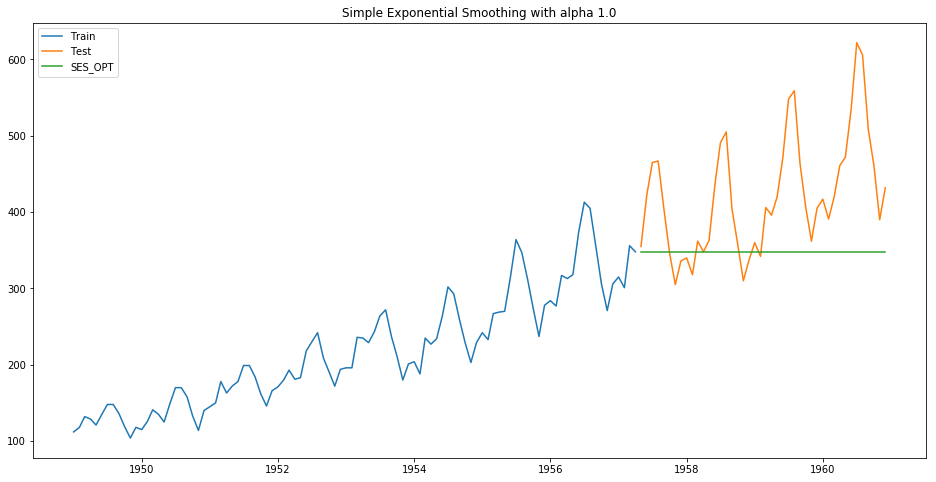

In [62]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Passengers']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Passengers'], label = 'Train')
plt.plot(test.index, test['Passengers'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [63]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg.SES))
mape_opt             =  MAPE(test['Passengers'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 1.00,  RMSE is 105.7498 MAPE is 18.96


In [64]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [65]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime   75.678000  13.04
0  RegressionOnTimeSeasonal   53.493000   9.01
0               Naive model  105.750000  18.96
0            Simple Average  216.644000  48.14
0     moving_avg_forecast_4   54.067000  10.71
0     moving_avg_forecast_6   67.887000  13.79
0     moving_avg_forecast_8   73.376000  14.76
0    moving_avg_forecast_12   69.008000  12.78
0                       SES  105.749812  18.96


In [66]:
import statsmodels.api as sm

In [67]:
y_hat_avg = test.copy()

In [68]:
model_fit = Holt(np.asarray(train['Passengers'])).fit()

In [69]:
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [70]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 1.0
Smoothing Slope 0.0
Initial Level 109.6164



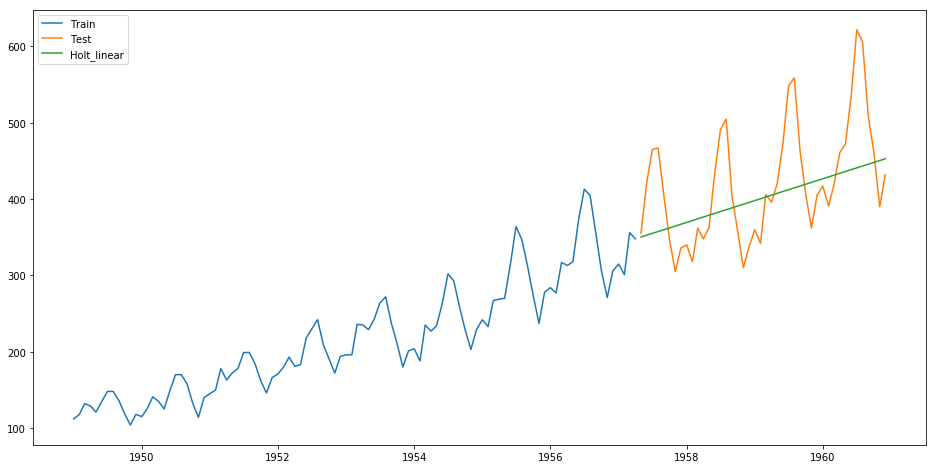

In [71]:
plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [72]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['Holt_linear']))
mape_opt             =  MAPE(test['Passengers'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 1.00,  RMSE is 69.9779 MAPE is 12.81


In [73]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_linear', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [74]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime   75.678000  13.04
0  RegressionOnTimeSeasonal   53.493000   9.01
0               Naive model  105.750000  18.96
0            Simple Average  216.644000  48.14
0     moving_avg_forecast_4   54.067000  10.71
0     moving_avg_forecast_6   67.887000  13.79
0     moving_avg_forecast_8   73.376000  14.76
0    moving_avg_forecast_12   69.008000  12.78
0                       SES  105.749812  18.96
0               Holt_linear   69.977912  12.81


# Method 8: Holt-Winters Method - Additive seasonality

In [75]:
y_hat_avg = test.copy()

In [76]:
model_fit = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [77]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

In [79]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.2632
Smoothing Slope:  0.0517
Smoothing Seasonal:  0.7368
Initial Level:  197.3867
Initial Slope:  1.7215
Initial Seasons:  [-86.0056 -80.0283 -66.113  -69.2347 -77.2744 -63.266  -50.2981 -50.4081
 -62.4952 -79.5573 -94.4937 -80.3275]



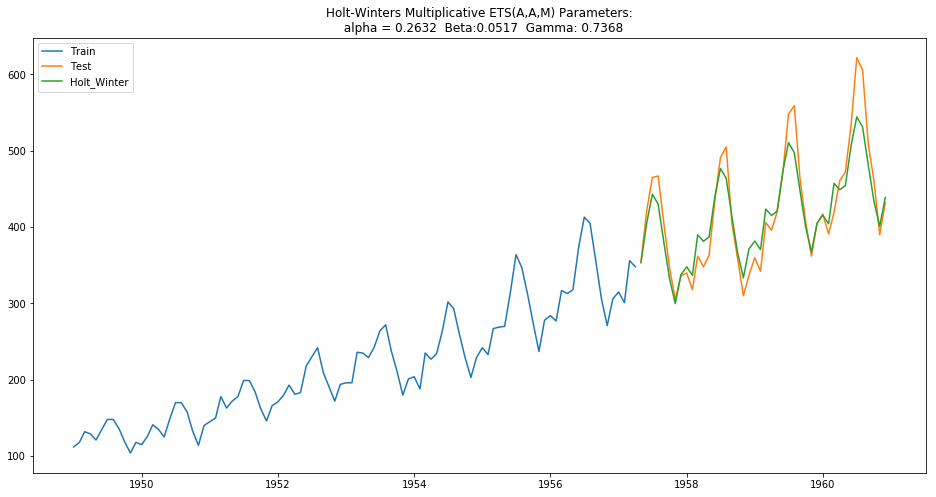

In [80]:
plt.figure(figsize=(16,8))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Multiplicative ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [82]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['Holt_Winter']))
mape_opt             =  MAPE(test['Passengers'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.26, beta = 0.05, gamma = 0.74, RMSE is 27.4398 MAPE is 4.96


In [83]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [84]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime   75.678000  13.04
0  RegressionOnTimeSeasonal   53.493000   9.01
0               Naive model  105.750000  18.96
0            Simple Average  216.644000  48.14
0     moving_avg_forecast_4   54.067000  10.71
0     moving_avg_forecast_6   67.887000  13.79
0     moving_avg_forecast_8   73.376000  14.76
0    moving_avg_forecast_12   69.008000  12.78
0                       SES  105.749812  18.96
0               Holt_linear   69.977912  12.81
0               Holt_Winter   27.439762   4.96


### Method 9: Holt-Winters Method - Multiplicative Model

In [85]:
y_hat_avg = test.copy()

In [97]:
model_fit = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods = 12 ,trend='mul', seasonal='mul').fit()

In [98]:
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

In [99]:
print('')
print('== Holt-Winters Additive ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,M) Parameters ==

Smoothing Level:  0.8421
Smoothing Slope:  0.1053
Smoothing Seasonal:  0.1579
Initial Level:  198.2222
Initial Slope:  1.0833
Initial Seasons:  [0.5741 0.5692 0.6636 0.6486 0.6457 0.7141 0.7641 0.7394 0.6613 0.5856
 0.5115 0.5834]



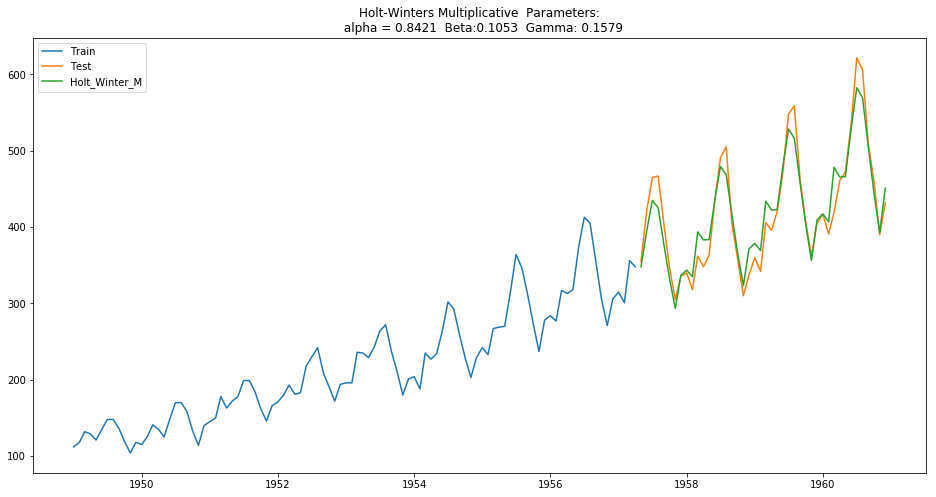

In [100]:
plt.figure(figsize=(16,8))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [101]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['Holt_Winter_M']))
mape_opt             =  MAPE(test['Passengers'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.84, beta = 0.11, gamma = 0.16, RMSE is 22.7385 MAPE is 4.22


In [102]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [103]:
print(resultsDf)

                     Method        rmse   mape
0          RegressionOnTime   75.678000  13.04
0  RegressionOnTimeSeasonal   53.493000   9.01
0               Naive model  105.750000  18.96
0            Simple Average  216.644000  48.14
0     moving_avg_forecast_4   54.067000  10.71
0     moving_avg_forecast_6   67.887000  13.79
0     moving_avg_forecast_8   73.376000  14.76
0    moving_avg_forecast_12   69.008000  12.78
0                       SES  105.749812  18.96
0               Holt_linear   69.977912  12.81
0               Holt_Winter   27.439762   4.96
0             Holt_Winter M   22.738528   4.22


In [104]:
y_hat_avg1 = test.copy()


== Holt-Winters Additive ETS(A,A,M) Parameters ==

Smoothing Level:  0.1
Smoothing Slope:  0.1
Smoothing Seasonal:  0.1
Initial Level:  198.2221
Initial Slope:  1.0833
Initial Seasons:  [0.6088 0.597  0.6657 0.6439 0.6342 0.6979 0.7555 0.7358 0.6531 0.5699
 0.4993 0.5546]

For alpha = 0.10, beta = 0.10, gamma = 0.10, RMSE is 52.8917 MAPE is 10.92

== Holt-Winters Additive ETS(A,A,M) Parameters ==

Smoothing Level:  0.3
Smoothing Slope:  0.3
Smoothing Seasonal:  0.3
Initial Level:  198.2211
Initial Slope:  1.0044
Initial Seasons:  [0.5573 0.5724 0.6598 0.6384 0.6216 0.6647 0.7168 0.6997 0.6187 0.5392
 0.4726 0.5454]

For alpha = 0.30, beta = 0.30, gamma = 0.30, RMSE is 43.6337 MAPE is 8.09

== Holt-Winters Additive ETS(A,A,M) Parameters ==

Smoothing Level:  0.5
Smoothing Slope:  0.5
Smoothing Seasonal:  0.5
Initial Level:  198.2215
Initial Slope:  0.9988
Initial Seasons:  [0.5657 0.6053 0.6718 0.6355 0.5893 0.6627 0.7412 0.7382 0.6656 0.5547
 0.4679 0.5459]

For alpha = 0.50, beta = 0

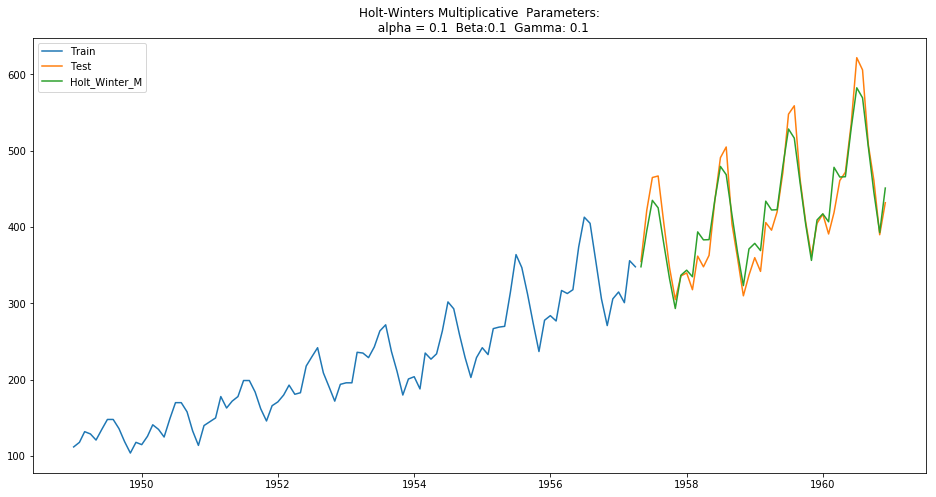

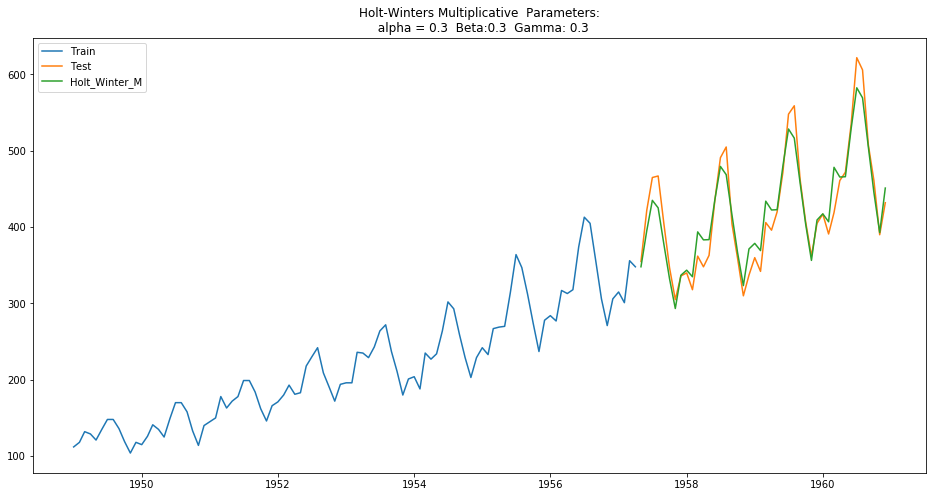

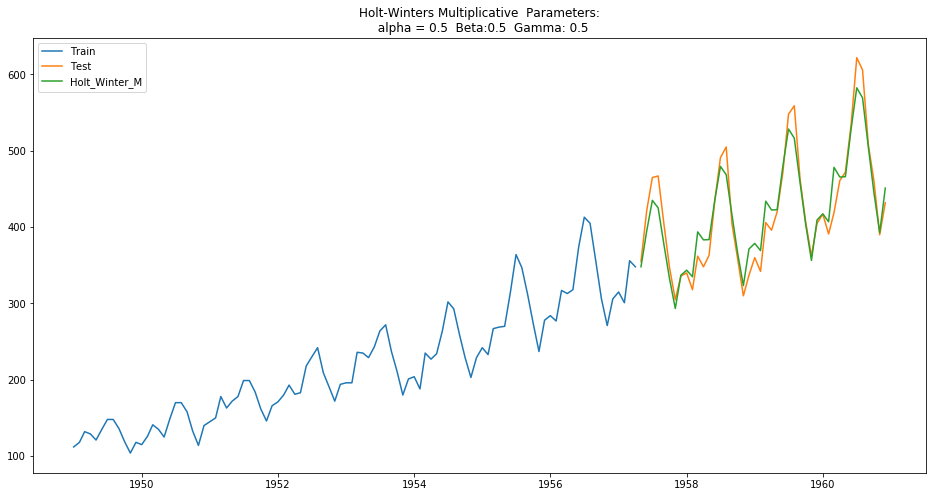

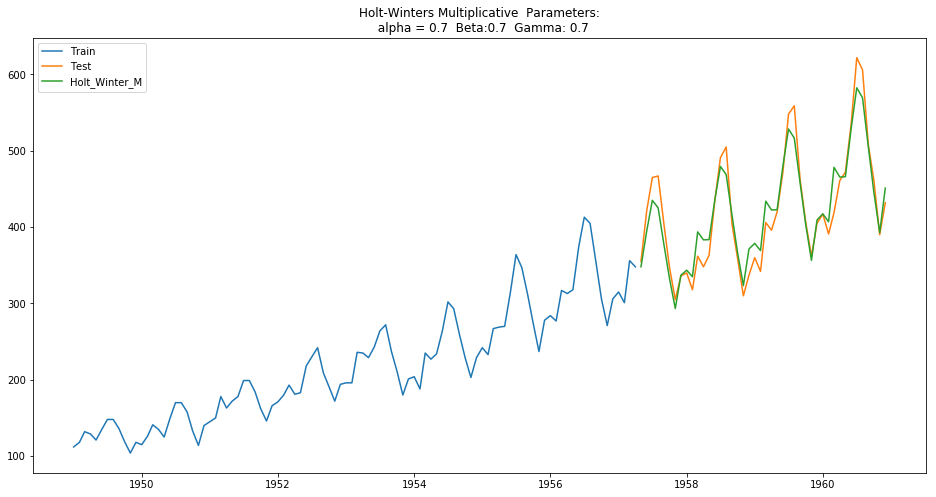

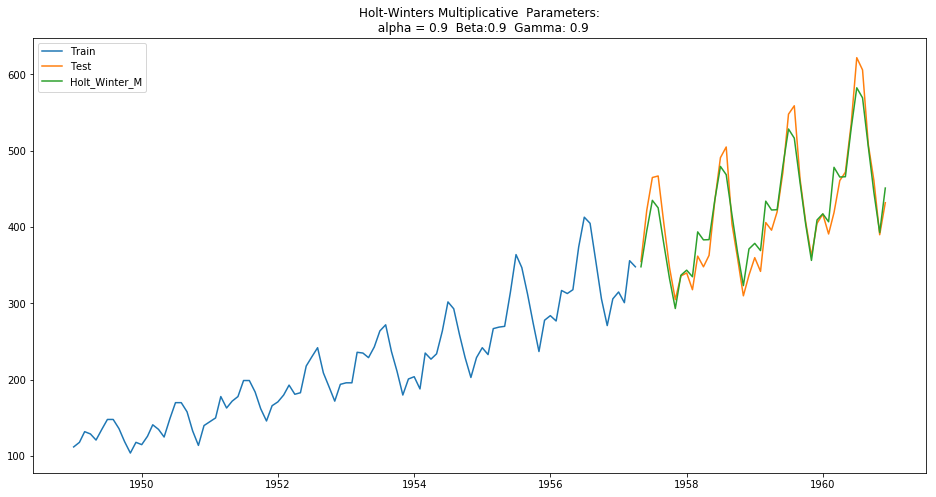

In [113]:
list = [0.1, 0.3, 0.5, 0.7, 0.9]
result = []
for i in list:
    model_fit = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods = 12 ,trend='mul', seasonal='mul').fit(smoothing_level = i, smoothing_slope = i, smoothing_seasonal = i)
    y_hat_avg1['Holt_Winter_M'] = model_fit.forecast(len(test))
    print('')
    print('== Holt-Winters Additive ETS(A,A,M) Parameters ==')
    print('')
    alpha_value = np.round(model_fit.params['smoothing_level'], 4)
    beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
    gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4)
     

    print('Smoothing Level: ', alpha_value)
    print('Smoothing Slope: ', beta_value)
    print('Smoothing Seasonal: ', gamma_value)
    print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
    print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
    print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
    print('')
    
    plt.figure(figsize=(16,8))
    plt.plot( train['Passengers'], label='Train')
    plt.plot(test['Passengers'], label='Test')
    plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
    plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
    plt.legend(loc='best')
    
    rmse_opt             =  np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg1['Holt_Winter_M']))
    mape_opt             =  MAPE(test['Passengers'], y_hat_avg1['Holt_Winter_M'])

    print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))
    result.append(rmse_opt)
print("The combined result is", result)